In [ ]:
!pip install pyunpack
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 8.6 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.makedirs('/content/benchpress')
os.makedirs('/content/hyperextension_bench')
os.makedirs('/content/leg_press')
os.makedirs('/content/plyometric_box')
os.makedirs('/content/power_rack')

In [ ]:
from pyunpack import Archive
Archive('/content/drive/MyDrive/data (1).7z').extractall("/content/")

In [ ]:
import zipfile
with zipfile.ZipFile('/content/data/benchpress.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/benchpress/')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/data/hyperextension-bench.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/hyperextension_bench/')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/data/leg-press.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/leg_press/')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/data/plyometric-box.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/plyometric_box/')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/data/power-rack.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/power_rack/')

In [ ]:
import os
len(os.listdir('/content/benchpress'))

415

In [ ]:
import os

dir_name = "/content/benchpress/"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".svg"):
        os.remove(os.path.join(dir_name, item))

dir_name = "/content/benchpress/"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".webp"):
        os.remove(os.path.join(dir_name, item))

In [ ]:
import os

dir_name = "/content/hyperextension_bench/"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".svg"):
        os.remove(os.path.join(dir_name, item))

dir_name = "/content/hyperextension_bench/"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".webp"):
        os.remove(os.path.join(dir_name, item))

In [ ]:
import os

dir_name = "/content/leg_press/"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".svg"):
        os.remove(os.path.join(dir_name, item))

dir_name = "/content/leg_press/"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".webp"):
        os.remove(os.path.join(dir_name, item))

In [ ]:
import os

dir_name = "/content/plyometric_box/"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".svg"):
        os.remove(os.path.join(dir_name, item))

dir_name = "/content/plyometric_box/"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".webp"):
        os.remove(os.path.join(dir_name, item))

In [ ]:
import os

dir_name = "/content/power_rack/"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".svg"):
        os.remove(os.path.join(dir_name, item))

dir_name = "/content/power_rack/"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".webp"):
        os.remove(os.path.join(dir_name, item))

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
os.makedirs('/content/Gym_Dataset_Model')

In [ ]:
os.makedirs('/content/Gym_Dataset')

In [ ]:
import splitfolders

splitfolders.ratio("/content/Gym_Dataset", output="/content/Gym_Dataset_Model",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

Copying files: 1733 files [00:00, 7662.06 files/s]


In [ ]:
%tensorflow_version 2.x

import warnings 
warnings.filterwarnings("ignore")

import os
import glob
import cv2
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from skimage.io import imread, imsave
from skimage.transform import resize 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNet 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow_datasets as tfds
import tensorflow_hub as hub

import imgaug as ia
from imgaug import augmenters as iaa
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


***MobileNet***

In [ ]:

src_path_train = "/content/Gym_Dataset_Model/train"
src_path_test = "/content/Gym_Dataset_Model/test"
src_path_valid='/content/Gym_Dataset_Model/val'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    height_shift_range=0.1,
    width_shift_range=0.1,
    brightness_range=(0.5,1.5),
    zoom_range = [1, 1.5])

test_datagen = ImageDataGenerator(rescale=1 / 255.0)
valid_datagen = ImageDataGenerator(rescale=1 / 255.0)

batch_size = 16
train_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(256, 256),
    batch_size=batch_size,
    seed=42
)
test_generator = test_datagen.flow_from_directory(
    directory=src_path_test,
    target_size=(256, 256),
    batch_size=batch_size,shuffle=False,
    seed=42
)
valid_generator = valid_datagen.flow_from_directory(
    directory=src_path_valid,
    target_size=(256, 256),
    batch_size=batch_size,shuffle=False,
    seed=42
)

Found 1383 images belonging to 5 classes.
Found 178 images belonging to 5 classes.
Found 171 images belonging to 5 classes.


In [ ]:
def build_model():
  base_model = MobileNet (input_shape=(256,256,3), 
                      weights='imagenet', 
                      include_top=False)
  
  output = layers.GlobalAveragePooling2D()(base_model.output)

  output = layers.Dense(5, activation='softmax')(output)

  model = Model(base_model.input, output)

  for layer in base_model.layers[:-4]:
      layer.trainable=  True

  optimizer = tf.keras.optimizers.Adam(0.00005)

  model.compile(loss='categorical_crossentropy', 
                optimizer=optimizer, 
                metrics=['accuracy'])
  
  model.summary()
  
  return model

model = build_model()
EPOCHS = 50
history=model.fit(train_generator,
          epochs=EPOCHS,
          validation_data=valid_generator)
model.save('/content/drive/MyDrive/Gym/MobileNet/mobilenet.h5')

17225924/17225924 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 128, 128, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 128, 128, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 128, 128, 32)     128    

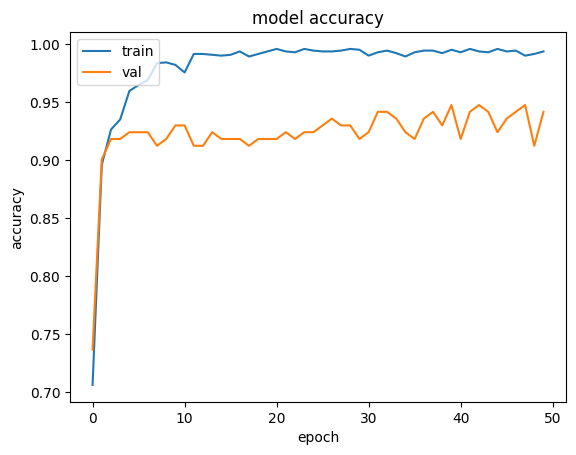

<Figure size 640x480 with 0 Axes>

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('/content/drive/MyDrive/Gym/MobileNet/acc.png')


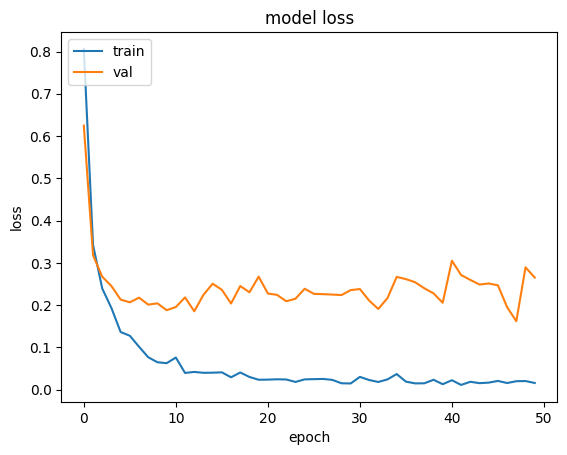

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('/content/drive/MyDrive/Gym/MobileNet/loss.png')

In [ ]:
y_pred=model.predict(test_generator)
y_predA=np.argmax(y_pred,axis=1)
print(y_predA)
Y=test_generator.labels
print(Y)

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
precision_F=precision_score(Y,y_predA,average='macro')
recall_F=recall_score(Y,y_predA,average='micro')
f1_score_F=f1_score(Y,y_predA,average='micro')
accuracy_F=accuracy_score(Y,y_predA)

print('Accuracy Score for MobileNet is ',accuracy_F*100)
print('\n')
print('Precision Score forMobileNet is',precision_F*100)
print('\n')
print('Recall Score for MobileNet is',recall_F*100)          
print('\n')
print('F1 Score for MobileNet is',f1_score_F*100)
print('Completed !!')

12/12 [==============================] - 1s 80ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 2 2 2 2 2 0 2 0
 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 3 3 3 3 3 3 3 3 3 3 3 4 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 0 4 0 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
Accuracy Score for MobileNet is  92.13483146067416


Precision Score forMobileNet is 94.60030165912518


Recall Score for MobileNet is 92.13483146067416


F1 Score for MobileNet is 92.13483146067416
Completed !!


***ResNet50***

In [ ]:
from tensorflow.keras.applications import ResNet50 

def build_model():
  base_model = ResNet50 (input_shape=(256,256,3), 
                      weights='imagenet', 
                      include_top=False)
  
  output = layers.GlobalAveragePooling2D()(base_model.output)

  output = layers.Dense(5, activation='softmax')(output)

  model = Model(base_model.input, output)

  for layer in base_model.layers[:-4]:
      layer.trainable=  True

  optimizer = tf.keras.optimizers.Adam(0.00005)

  model.compile(loss='categorical_crossentropy', 
                optimizer=optimizer, 
                metrics=['accuracy'])
  
  model.summary()
  
  return model
model = build_model()
EPOCHS = 50
history=model.fit(train_generator,
          epochs=EPOCHS,
          validation_data=valid_generator)
model.save('/content/drive/MyDrive/Gym/ResNet50/resnet50.h5')

94765736/94765736 [==============================] - 5s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                           

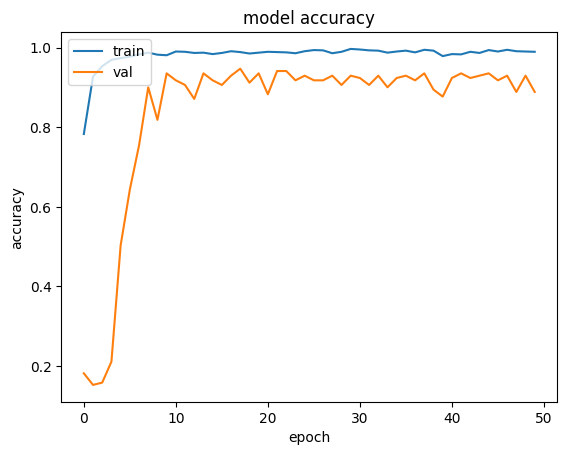

<Figure size 640x480 with 0 Axes>

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('/content/drive/MyDrive/Gym/ResNet50/acc.png')


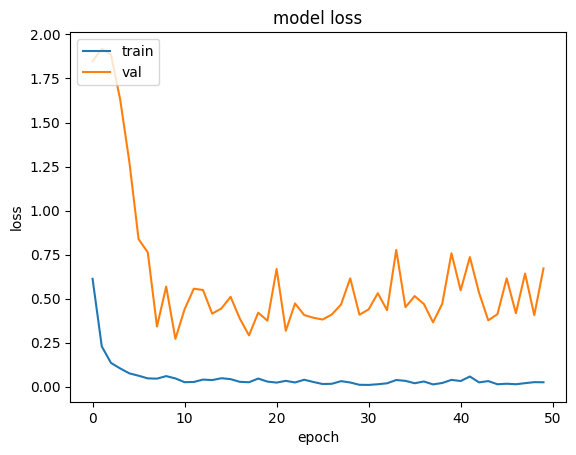

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('/content/drive/MyDrive/Gym/ResNet50/loss.png')

In [ ]:
y_pred=model.predict(test_generator)
y_predA=np.argmax(y_pred,axis=1)
print(y_predA)
Y=test_generator.labels
print(Y)

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
precision_F=precision_score(Y,y_predA,average='macro')
recall_F=recall_score(Y,y_predA,average='micro')
f1_score_F=f1_score(Y,y_predA,average='micro')
accuracy_F=accuracy_score(Y,y_predA)

print('Accuracy Score for ResNet50 is',accuracy_F*100)
print('\n')
print('Precision Score for ResNet50 is',precision_F*100)
print('\n')
print('Recall Score for ResNet50 is',recall_F*100)          
print('\n')
print('F1 Score for ResNet50 is',f1_score_F*100)
print('Completed !!')

12/12 [==============================] - 2s 119ms/step
[0 0 0 1 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 1 1 1 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 0
 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2 2 3 3 3 3 3 0 3 3 3 3 3 4 3
 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 0 4 0 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
Accuracy Score for ResNet50 is 89.8876404494382


Precision Score for ResNet50 is 90.70456667091291


Recall Score for ResNet50 is 89.8876404494382


F1 Score for ResNet50 is 89.8876404494382
Completed !!


***VGG16***

In [ ]:
from tensorflow.keras.applications import vgg16

def build_model():
  base_model = vgg16.VGG16(input_shape=(256,256,3), 
                      weights='imagenet', 
                      include_top=False)
  
  output = layers.GlobalAveragePooling2D()(base_model.output)

  output = layers.Dense(5, activation='softmax')(output)

  model = Model(base_model.input, output)

  for layer in base_model.layers[:-4]:
      layer.trainable=  True

  optimizer = tf.keras.optimizers.Adam(0.00005)

  model.compile(loss='categorical_crossentropy', 
                optimizer=optimizer, 
                metrics=['accuracy'])
  
  model.summary()
  
  return model
model = build_model()

EPOCHS = 50
history=model.fit(train_generator,
          epochs=EPOCHS,
          validation_data=valid_generator)

model.save('/content/drive/MyDrive/Gym/VGG16/vgg16.h5')

58889256/58889256 [==============================] - 4s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                            

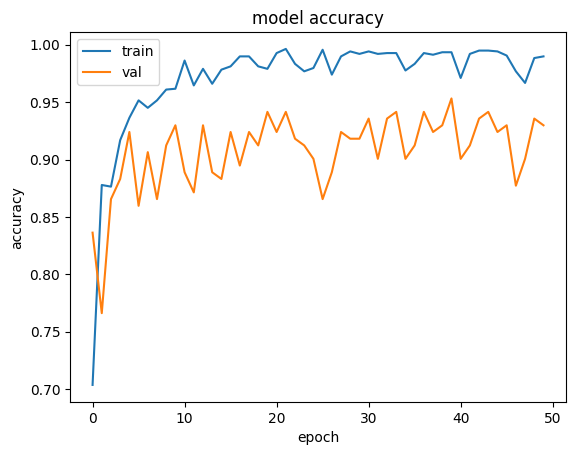

<Figure size 640x480 with 0 Axes>

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('/content/drive/MyDrive/Gym/VGG16/acc.png')


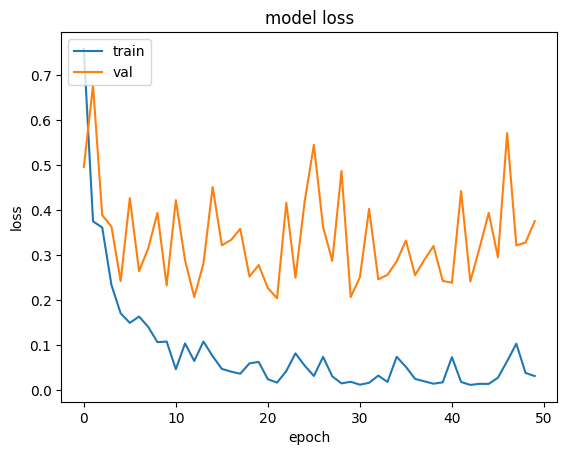

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('/content/drive/MyDrive/Gym/VGG16/loss.png')

In [ ]:
y_pred=model.predict(test_generator)
y_predA=np.argmax(y_pred,axis=1)
print(y_predA)
Y=test_generator.labels
print(Y)

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
precision_F=precision_score(Y,y_predA,average='macro')
recall_F=recall_score(Y,y_predA,average='micro')
f1_score_F=f1_score(Y,y_predA,average='micro')
accuracy_F=accuracy_score(Y,y_predA)

print('Accuracy Score for VGG16 is',accuracy_F*100)
print('\n')
print('Precision Score for VGG16 is',precision_F*100)
print('\n')
print('Recall Score for VGG16 is',recall_F*100)          
print('\n')
print('F1 Score for VGG16 is',f1_score_F*100)
print('Completed !!')

12/12 [==============================] - 2s 145ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 2 2 2 2 2 0 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 3 3 3 3 3 3 3 3 3 3 3 4 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 0 4 0 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
Accuracy Score for VGG16 is 92.13483146067416


Precision Score for VGG16 is 94.69433962264151


Recall Score for VGG16 is 92.13483146067416


F1 Score for VGG16 is 92.13483146067416
Completed !!


***XceptionNet***

In [ ]:
from tensorflow.keras.applications import Xception

def build_model():
  base_model = Xception(input_shape=(256,256,3), 
                      weights='imagenet', 
                      include_top=False)
  
  output = layers.GlobalAveragePooling2D()(base_model.output)

  output = layers.Dense(5, activation='softmax')(output)

  model = Model(base_model.input, output)

  for layer in base_model.layers[:-4]:
      layer.trainable=  True

  optimizer = tf.keras.optimizers.Adam(0.00005)

  model.compile(loss='categorical_crossentropy', 
                optimizer=optimizer, 
                metrics=['accuracy'])
  
  model.summary()
  
  return model

model = build_model()

EPOCHS = 50
history=model.fit(train_generator,
          epochs=EPOCHS,
          validation_data=valid_generator)

model.save('/content/drive/MyDrive/Gym/XceptionNet/xception.h5')

83683744/83683744 [==============================] - 5s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                    

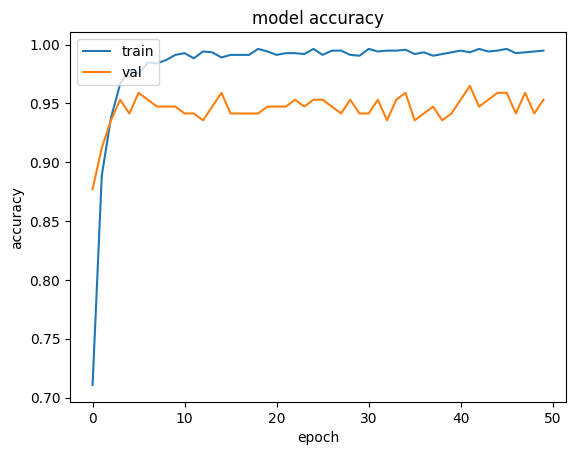

<Figure size 640x480 with 0 Axes>

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('/content/drive/MyDrive/Gym/XceptionNet/acc.png')


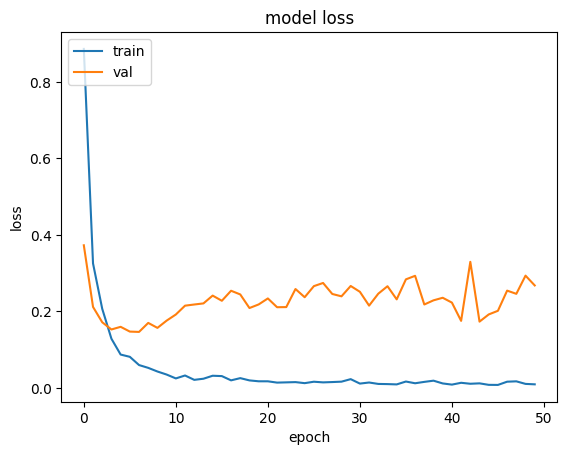

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('/content/drive/MyDrive/Gym/XceptionNet/loss.png')

In [ ]:
y_pred=model.predict(test_generator)
y_predA=np.argmax(y_pred,axis=1)
print(y_predA)
Y=test_generator.labels
print(Y)

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
precision_F=precision_score(Y,y_predA,average='macro')
recall_F=recall_score(Y,y_predA,average='micro')
f1_score_F=f1_score(Y,y_predA,average='micro')
accuracy_F=accuracy_score(Y,y_predA)

print('Accuracy Score for XceptionNet is',accuracy_F*100)
print('\n')
print('Precision Score for XceptionNet is',precision_F*100)
print('\n')
print('Recall Score for XceptionNet is',recall_F*100)          
print('\n')
print('F1 Score for XceptionNet is',f1_score_F*100)
print('Completed !!')

12/12 [==============================] - 2s 121ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 2 2 2 2 0 2 2
 2 2 2 2 4 2 2 2 2 0 2 2 2 2 2 2 2 1 2 2 2 4 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 0 4 0 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
Accuracy Score for XceptionNet is 93.82022471910112


Precision Score for XceptionNet is 94.6337464751787


Recall Score for XceptionNet is 93.82022471910112


F1 Score for XceptionNet is 93.82022471910112
Completed !!


***Deployment of XceptionNet***

In [3]:
!pip install pyngrok==4.1.1
!pip install flask_ngrok
!ngrok authtoken 2OYNUyfHjU7Otx6RuaLbMEfHpAo_78mCAwcmN33TSQCNuz5pP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15979 sha256=bcf58fee0900cc656a175a190d7787140c3b79a35af2e357b645dd2575cea725
  Stored in directory: /root/.cache/pip/wheels/89/2d/c2/abe6bcfde6bce368c00ecd73310c11edb672c3eda09a090cfa
Successfully built pyngrok
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [6]:
#This line needs to be run only once if you are re running the code make sure there is no folder of 'Image_Uplaod' If  this is not
#there then only run this cell . If the folder ' Image_Upload is already present, no need to run this cell'
os.mkdir('/content/Image_Upload')

In [7]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from flask import Flask, render_template, request
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import flask
from flask import Flask, render_template, request, redirect, url_for
import pickle
import numpy as np
from flask_ngrok import run_with_ngrok
import glob
import random

import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/FinalSubmission/Deployment/webapp.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')
model_path='/content/drive/MyDrive/FinalSubmission/XceptionNet/xception.h5'

def get_model():
    global model
    model = load_model(model_path)
    print("Model loaded!")

def load_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    return img_tensor

def prediction(img_path):
    new_image = load_image(img_path)
    pred = model.predict(new_image)
    pred=np.argmax(pred,axis=1)
    print(pred)

    if pred==0:
      return "That's a bench press! Focus on pushing through your chest!", "https://www.youtube.com/embed/gRVjAtPip0Y"
    elif pred==1:
      return "That's a hyperextension bench! It's usually used to hit either your lower back or abdominals", "https://www.youtube.com/embed/ph3pddpKzzw"
    elif pred==2:
      return "That's a leg press! Focus on pushing the weight through your heels and not your toes! Don't strain your knees by allowing them to bend past your toes. You can also use the leg press to work your calves", "https://www.youtube.com/embed/VFk3RzndUEc"
    elif pred==3:
      return "That's a plyometric box! The plyo-box can be incorporated into any HIIT workout.", "https://www.youtube.com/embed/dvggf9hPwtM"
    elif pred==4:
      return "That's a power rack!", "https://www.youtube.com/embed/sXXnLstL80A"

get_model()

app = Flask(__name__, template_folder='webapp/templates', static_folder='webapp/static')
run_with_ngrok(app)

@app.route("/", methods=['GET', 'POST'])
def home():
    return render_template('home.html')

@app.route("/predict", methods=['GET', 'POST'])
def predict():
    if request.method == 'POST':
        file = request.files['file']
        filename = file.filename
        file_path = os.path.join('/content/Image_Upload', filename)
        file.save(file_path)
        print(filename)
        product, link = prediction(file_path)
        print(product)
        
    return render_template('predict.html', product = product,link=link, user_image = file_path)

@app.route("/example")
def example():
    return render_template('example.html')

@app.route("/random_example", methods=['GET', 'POST'])
def random_example():
    if request.method == 'POST':
        random_image = random.choice(glob.glob("webapp/static/example/*"))
        return render_template('random_example.html', random_image=random_image)

if __name__ == "__main__":
    app.run()




Model loaded!
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://7566-35-190-135-75.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 16:02:24] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 16:02:25] "GET /static/img/logo.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 16:02:25] "GET /static/style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 16:02:25] "GET /favicon.ico HTTP/1.1" 404 -


BodyMax_CF610_hero_1600_1600.jpg
1/1 [==============================] - 1s 1s/step


INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 16:02:29] "POST /predict HTTP/1.1" 200 -


[1]
That's a hyperextension bench! It's usually used to hit either your lower back or abdominals


INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 16:02:29] "GET /static/style.css HTTP/1.1" 304 -


In [ ]:
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
import os

app = Flask(__name__, template_folder='webapp/templates', static_folder='webapp/static')
run_with_ngrok(app)

@app.route("/", methods=['GET', 'POST'])
def home():
    return render_template('home.html')

@app.route("/predict", methods=['GET', 'POST'])
def predict():
    if request.method == 'POST':
        file = request.files['file']
        filename = file.filename
        file_path = os.path.join('/content/Image_Upload', filename)
        file.save(file_path)
        print(filename)
        product, link = prediction(file_path)
        print(product)
        
    return render_template('predict.html', product=product, link=link, user_image=file_path)

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://2742-34-126-126-248.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:04:16] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:04:17] "GET /static/style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:04:17] "GET /favicon.ico HTTP/1.1" 404 -


BodyMax_CF610_close2_1600_1600.jpg
1/1 [==============================] - 1s 687ms/step


INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:04:27] "POST /predict HTTP/1.1" 200 -


[1]
That's a hyperextension bench! It's usually used to hit either your lower back or abdominals


INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:04:28] "GET /static/style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:04:34] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:04:34] "GET /static/style.css HTTP/1.1" 304 -


back-hyperextension-bench-3l.jpg
1/1 [==============================] - 0s 28ms/step


INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:09:36] "POST /predict HTTP/1.1" 200 -


[1]
That's a hyperextension bench! It's usually used to hit either your lower back or abdominals


INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:09:36] "GET /static/style.css HTTP/1.1" 304 -


BodyMax_CF610_close2_1600_1600.jpg
1/1 [==============================] - 0s 23ms/step


INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:12:09] "POST /predict HTTP/1.1" 200 -


[1]
That's a hyperextension bench! It's usually used to hit either your lower back or abdominals


INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:12:10] "GET /static/style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:12:14] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:12:14] "GET /static/style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:17:16] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:17:17] "GET /static/style.css HTTP/1.1" 304 -


BodyMax_CF610_close2_1600_1600.jpg
1/1 [==============================] - 0s 25ms/step


INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:19:34] "POST /predict HTTP/1.1" 200 -


[1]
That's a hyperextension bench! It's usually used to hit either your lower back or abdominals


INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:19:35] "GET /static/style.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:19:40] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Apr/2023 10:19:41] "GET /static/style.css HTTP/1.1" 304 -
